# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


640

In [3]:
# cities_df = pd.DataFrame(cities)
# cities_df.columns = ["City"]
# cities_df.head()

,City
0,vaitupu
1,aitape
2,tilichiki
3,norman wells
4,rikitea


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# config info
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build query URL
query_url = f"{url}appid={api_key}&q=" 

In [6]:
#These are the labels

Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []
city_name = []

for city in cities:
    print(query_url + city)
    try:
        weather_response = requests.get(query_url + city).json()
            
        # these are the arrays
        Cloudiness.append(weather_response['clouds']['all'])
        Country.append(weather_response['sys']['country'])
        Date.append(weather_response['dt'])
        Humidity.append(weather_response['main']['humidity'])
        Lat.append(weather_response['coord']['lat'])
        Lng.append(weather_response['coord']['lon'])
        Max_Temp.append(weather_response['main']['temp_max'])
        Wind_Speed.append(weather_response['wind']['speed'])
        city_name.append(city)
        
    except:
        print("city not found")
        pass
    
city_df= pd.DataFrame({
        "City": city_name,
        "Cloudiness": Cloudiness,
        "Country": Country,
        "Date": Date,
        "Humidity": Humidity,
        "Lat": Lat,
        "Lng": Lng,
        "Max_Temp": Max_Temp,
        "Wind_Speed": Wind_Speed})

http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=vaitupu
city not found
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=aitape
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=tilichiki
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=norman wells
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=rikitea
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=mancio lima
city not found
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=esperance
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=college
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=hermanus
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=tra v

http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=longyearbyen
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=okhotsk
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=adrar
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=atuona
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=rehoboth
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=ghanzi
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=vardo
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=pevek
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=bluff
http://api.openweathermap.org/data/2.5/weath

http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=chapais
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=san cristobal
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=tumannyy
city not found
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=umzimvubu
city not found
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=middletown
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=taoudenni
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=salalah
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=kanniyakumari
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=keskin
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q

http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=kruisfontein
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=airai
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=atherton
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=leon
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=hay river
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=itamarandiba
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=moron
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=castro
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=qinhuangdao
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=katsuura
http://api.openweathermap.org/

http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=honiara
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=ukiah
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=greenville
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=camacha
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=walla walla
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=newburn
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=truro
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=khor
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=loralai
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=kuala lipis
http://api.openweathermap.org/data/2

http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=vila velha
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=parkes
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=akureyri
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=clarence town
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=lisakovsk
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=maryborough
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=dunedin
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=nemuro
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=andenes
city not found
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=blagoyevo
http://ap

http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=billings
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=dhidhdhoo
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=hami
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=ambodifototra
city not found
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=ust-tsilma
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=hofn
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=trapani
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=phuket
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=dongsheng
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=quimperle
http://api.openw

http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=serenje
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=dalby
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=stoyba
city not found
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=talnakh
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=bontang
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=hidalgo
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=son la
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=bluefields
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=klaksvik
http://api.openweathermap.org/data/2.5/weather?appid=f354eaad6a72cb66fa7fd9227ec5b83d&q=poum
http://api.openweathermap.or

In [7]:
city_df.to_csv("output_data/cities.csv")

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
city_df.count()

City          568
Cloudiness    568
Country       568
Date          568
Humidity      568
Lat           568
Lng           568
Max_Temp      568
Wind_Speed    568
dtype: int64

In [9]:
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,aitape,80,PG,1542087091,98,-3.15,142.36,300.695,1.46
1,tilichiki,12,RU,1542087091,77,60.47,166.10,248.820,1.46
2,norman wells,90,CA,1542081600,92,65.28,-126.83,263.150,5.16
3,rikitea,68,PF,1542087092,100,-23.12,-134.97,296.145,4.64
4,esperance,20,TT,1542085200,88,10.24,-61.45,299.150,3.26


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

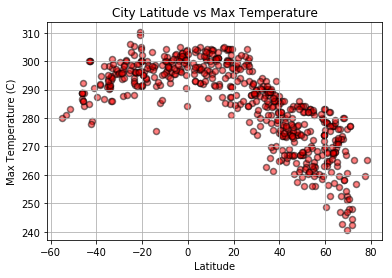

In [10]:
# scatter plot of latitude vs max temperature in cities
plt.scatter(city_df["Lat"], city_df["Max_Temp"], marker="o", alpha = 0.50, linewidth = 1.5,facecolors="red", edgecolors="black")

# graph properties
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("TemperatureOfCities.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

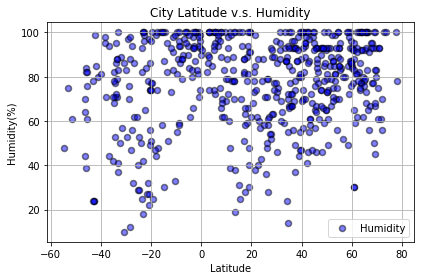

In [11]:
# scatter plot of latitude vs humidity in cities
plt.scatter(city_df["Lat"], city_df["Humidity"], marker="o", alpha = 0.50, linewidth = 1.5, facecolors="blue", edgecolors="black")

# graph properties
plt.title("City Latitude v.s. Humidity")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.tight_layout()
plt.legend(loc="best")

# Save figure
plt.savefig("HumidityOfCities.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

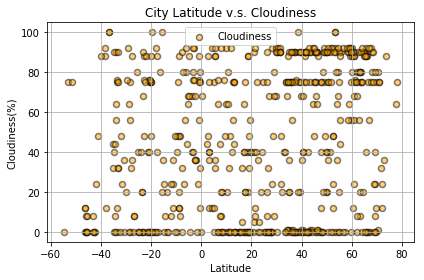

In [12]:
# scatter plot of latitude vs cloudiness in cities
plt.scatter(city_df["Lat"], city_df["Cloudiness"], marker="o", alpha = 0.50, linewidth = 1.5, facecolors="orange", edgecolors="black")

# graph properties
plt.title("City Latitude v.s. Cloudiness")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.tight_layout()
plt.legend(loc="best")

# Save figure
plt.savefig("CloudinessOfCities.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

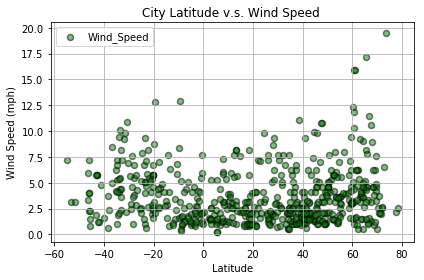

In [13]:
# scatter plot of latitude vs wind speed in cities
plt.scatter(city_df["Lat"], city_df["Wind_Speed"], marker="o", alpha = 0.50, linewidth = 1.5, facecolors="green", edgecolors="black")

# graph properties
plt.title("City Latitude v.s. Wind Speed ")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.tight_layout()
plt.legend(loc="best")

# Save figure
plt.savefig("WindSpeedOfCities.png")

# Show plot
plt.show()

In [ ]:
OBSERVATIONS
(1) There is a lowest wind speed is between a latitude of 20 to 60.
(2) Most cities exist in an area that is between 50 - 100 degrees (f).
(3) There are more populated cities above the equator.